In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
pl.rcParams['figure.figsize']=10,8

In [3]:
df=pd.read_excel('Covid cases in India.xlsx')
df_india=df.copy()

In [4]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [8]:
individual=pd.read_csv('IndividualDetails.csv',parse_dates=True)

In [22]:
individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [23]:
df_india['Total']=df_india['Total Confirmed cases ( Foreign National )']+df_india['Total Confirmed cases (Indian National)']

<BarContainer object of 25 artists>

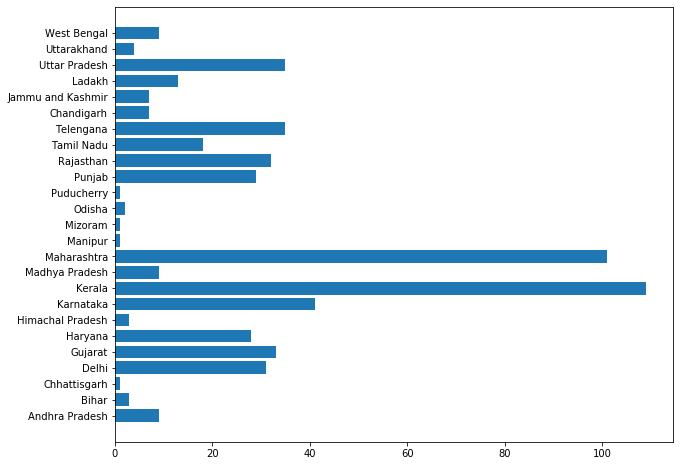

In [24]:
pl.barh(df_india['Name of State / UT'],df_india['Total'])

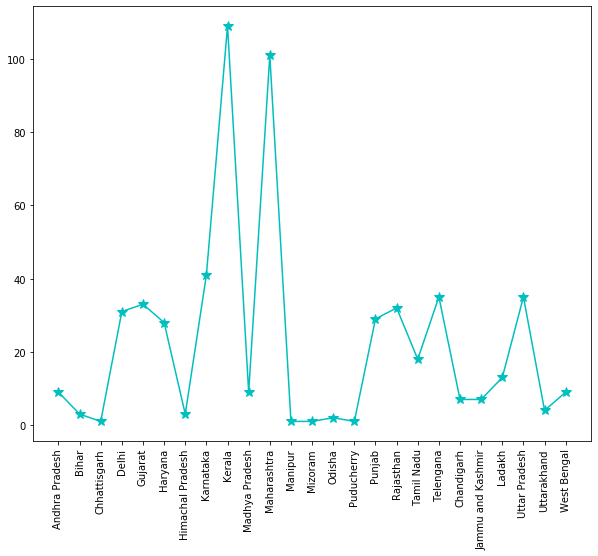

In [54]:
pl.plot(df_india['Total'],marker='*',markersize=10,c='c')
pl.xticks(range(len(x)),x,rotation='vertical')
x=list(df['Name of State / UT'])

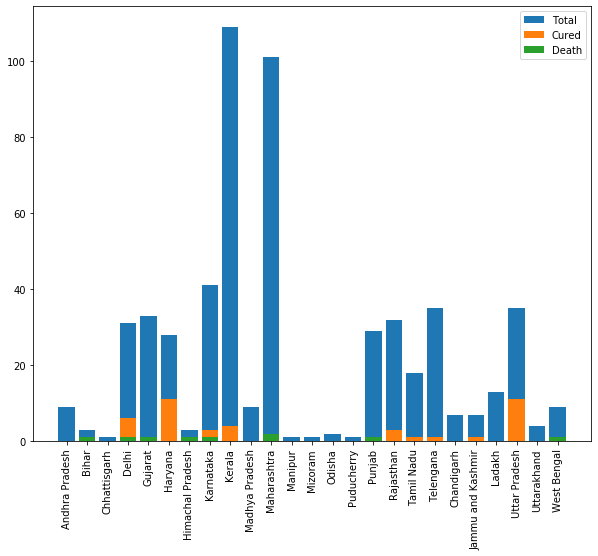

In [83]:
pl.bar(df_india['Name of State / UT'],df_india['Total'],label='Total')
pl.bar(df_india['Name of State / UT'],df_india['Cured'],label='Cured')
pl.bar(df_india['Name of State / UT'],df_india['Death'],label='Death')
pl.xticks(range(len(x)),x,rotation='vertical')

pl.legend()

In [55]:
df_india.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death',
       'Total'],
      dtype='object')

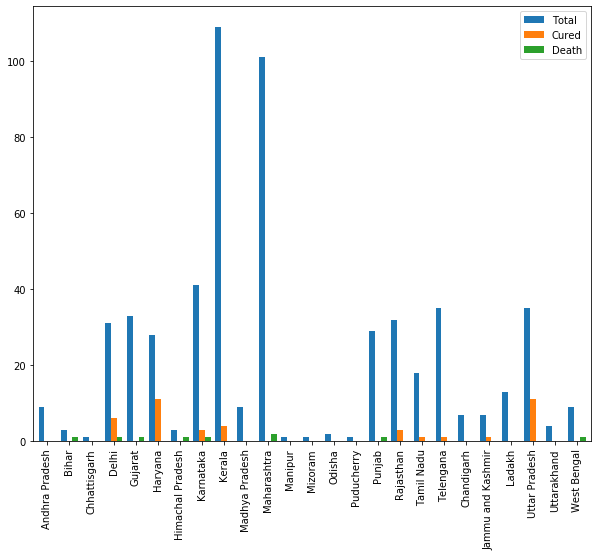

In [197]:
df_india[['Name of State / UT','Total','Cured','Death']].plot(kind='bar',stacked=False,width=0.8)
pl.xticks(range(len(x)),x,rotation='vertical')
pl.show()

In [107]:
India_coor=pd.read_excel('Indian Coordinates.xlsx')
dbd_India=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Korea=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Wuhan=pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [119]:
a=df_india['Total'].sum()
print("Total cases in india =",a)

Total cases in india = 562


In [121]:
df_india['Total_Active']=df_india['Total']-df['Death']

In [122]:
df_india.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Total_Active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,2
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,30
4,5,Gujarat,32,1,0,1,33,32
5,6,Haryana,14,14,11,0,28,28
6,7,Himachal Pradesh,3,0,0,1,3,2
7,8,Karnataka,41,0,3,1,41,40
8,9,Kerala,101,8,4,0,109,109
9,10,Madhya Pradesh,9,0,0,0,9,9


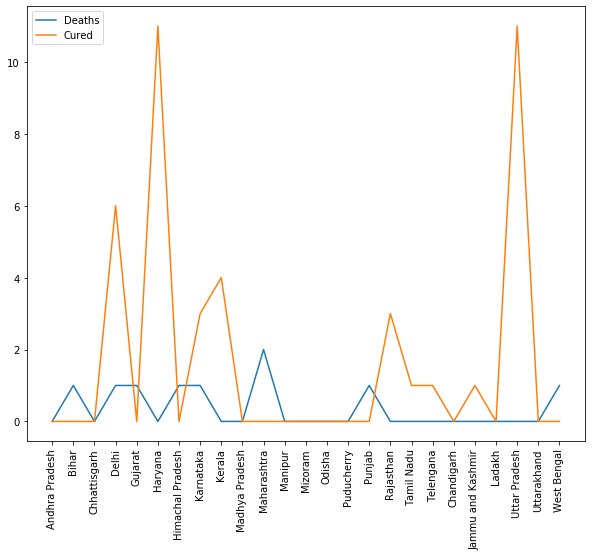

In [149]:
pl.plot(df_india['Name of State / UT'],df_india['Death'],label='Deaths')
pl.plot(df_india['Name of State / UT'],df_india['Cured'],label='Cured')
pl.xticks(range(len(x)),x,rotation='vertical')
pl.legend()
pl.show()

In [176]:
coord_India=pd.read_excel('Indian Coordinates.xlsx')

In [177]:
df_full=pd.merge(df_india,coord_India,on='Name of State / UT')

In [194]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')
for lat,lon,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,lon],radius=value*0.8,color="#007849",fill=True).add_to(map)

In [195]:
map

In [173]:
df_ful


,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total,Total_Active,Latitude,Longitude
0,1,Andhra Pradesh,9,0,0,0,9,9,14.750429,78.570026
1,4,Delhi,30,1,6,1,31,30,28.669993,77.230004
2,6,Haryana,14,14,11,0,28,28,28.450006,77.019991
3,8,Karnataka,41,0,3,1,41,40,12.570381,76.919997
4,9,Kerala,101,8,4,0,109,109,8.900373,76.569993
5,11,Maharashtra,98,3,0,2,101,99,19.250232,73.160175
6,16,Punjab,29,0,0,1,29,28,31.519974,75.980003
7,17,Rajasthan,30,2,3,0,32,32,26.449999,74.639981
8,18,Tamil Nadu,16,2,1,0,18,18,12.920386,79.150042
9,19,Telengana,25,10,1,0,35,35,18.112400,79.019300
